# **Part A**

**• DOMAIN:** Electronics and Telecommunication

**• CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

**• DATA DESCRIPTION:** The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

**• PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality

# **Steps and tasks:**

**1. Data import and Understanding**

A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/NN_Project_Data_-_Signal_(1).csv")
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


B. Check for missing values and print percentage for each attribute.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [ ]:
data.duplicated().sum()

240

In [ ]:
data.loc[data.duplicated(),:]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
data = data.drop_duplicates()

In [ ]:
print(data.duplicated().sum())
print(data.shape)

0
(1359, 12)


D. Visualise distribution of the target variable

In [ ]:
data.Signal_Strength.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

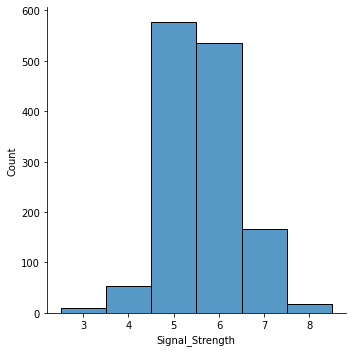

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(data, x="Signal_Strength",discrete = True)

E. Share insights from the initial data analysis (at least 2)

1.   No missing/Nan values found in the data.

2.   Significant number of duplicates which have been dropped by keeping   first and dropping the duplicate.

3.   Target variable values are not equally distributed and we might need to resample in later stages during model building italicized text



-

******************

# 2. Data preprocessing

A. Split the data into X & Y.

In [ ]:
X = data.drop("Signal_Strength", axis=1)
y = data['Signal_Strength']

In [ ]:
X

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: Signal_Strength, Length: 1359, dtype: int64

B. Split the data into train & test with 70:30 proportion.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state= 42)

C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [ ]:
print("X_train Shape:", X_train.shape, "X_test Shape:", X_test.shape)
print(" ")
print("y_train Shape:",y_train.shape, "y_test Shape:", y_test.shape)
print('\nTraining data =',round(100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]),2),"% of total data")
print('\nTesting data =',round(100*X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]),2),"% of total data")

print(" ")
print("The data is correctly distributed in 70:30 ratio among train and test and is in sync")

X_train Shape: (951, 11) X_test Shape: (408, 11)
 
y_train Shape: (951,) y_test Shape: (408,)

Training data = 69.98 % of total data

Testing data = 30.02 % of total data
 
The data is correctly distributed in 70:30 ratio among train and test and is in sync


D. Normalise the train and test data with appropriate method

In [ ]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


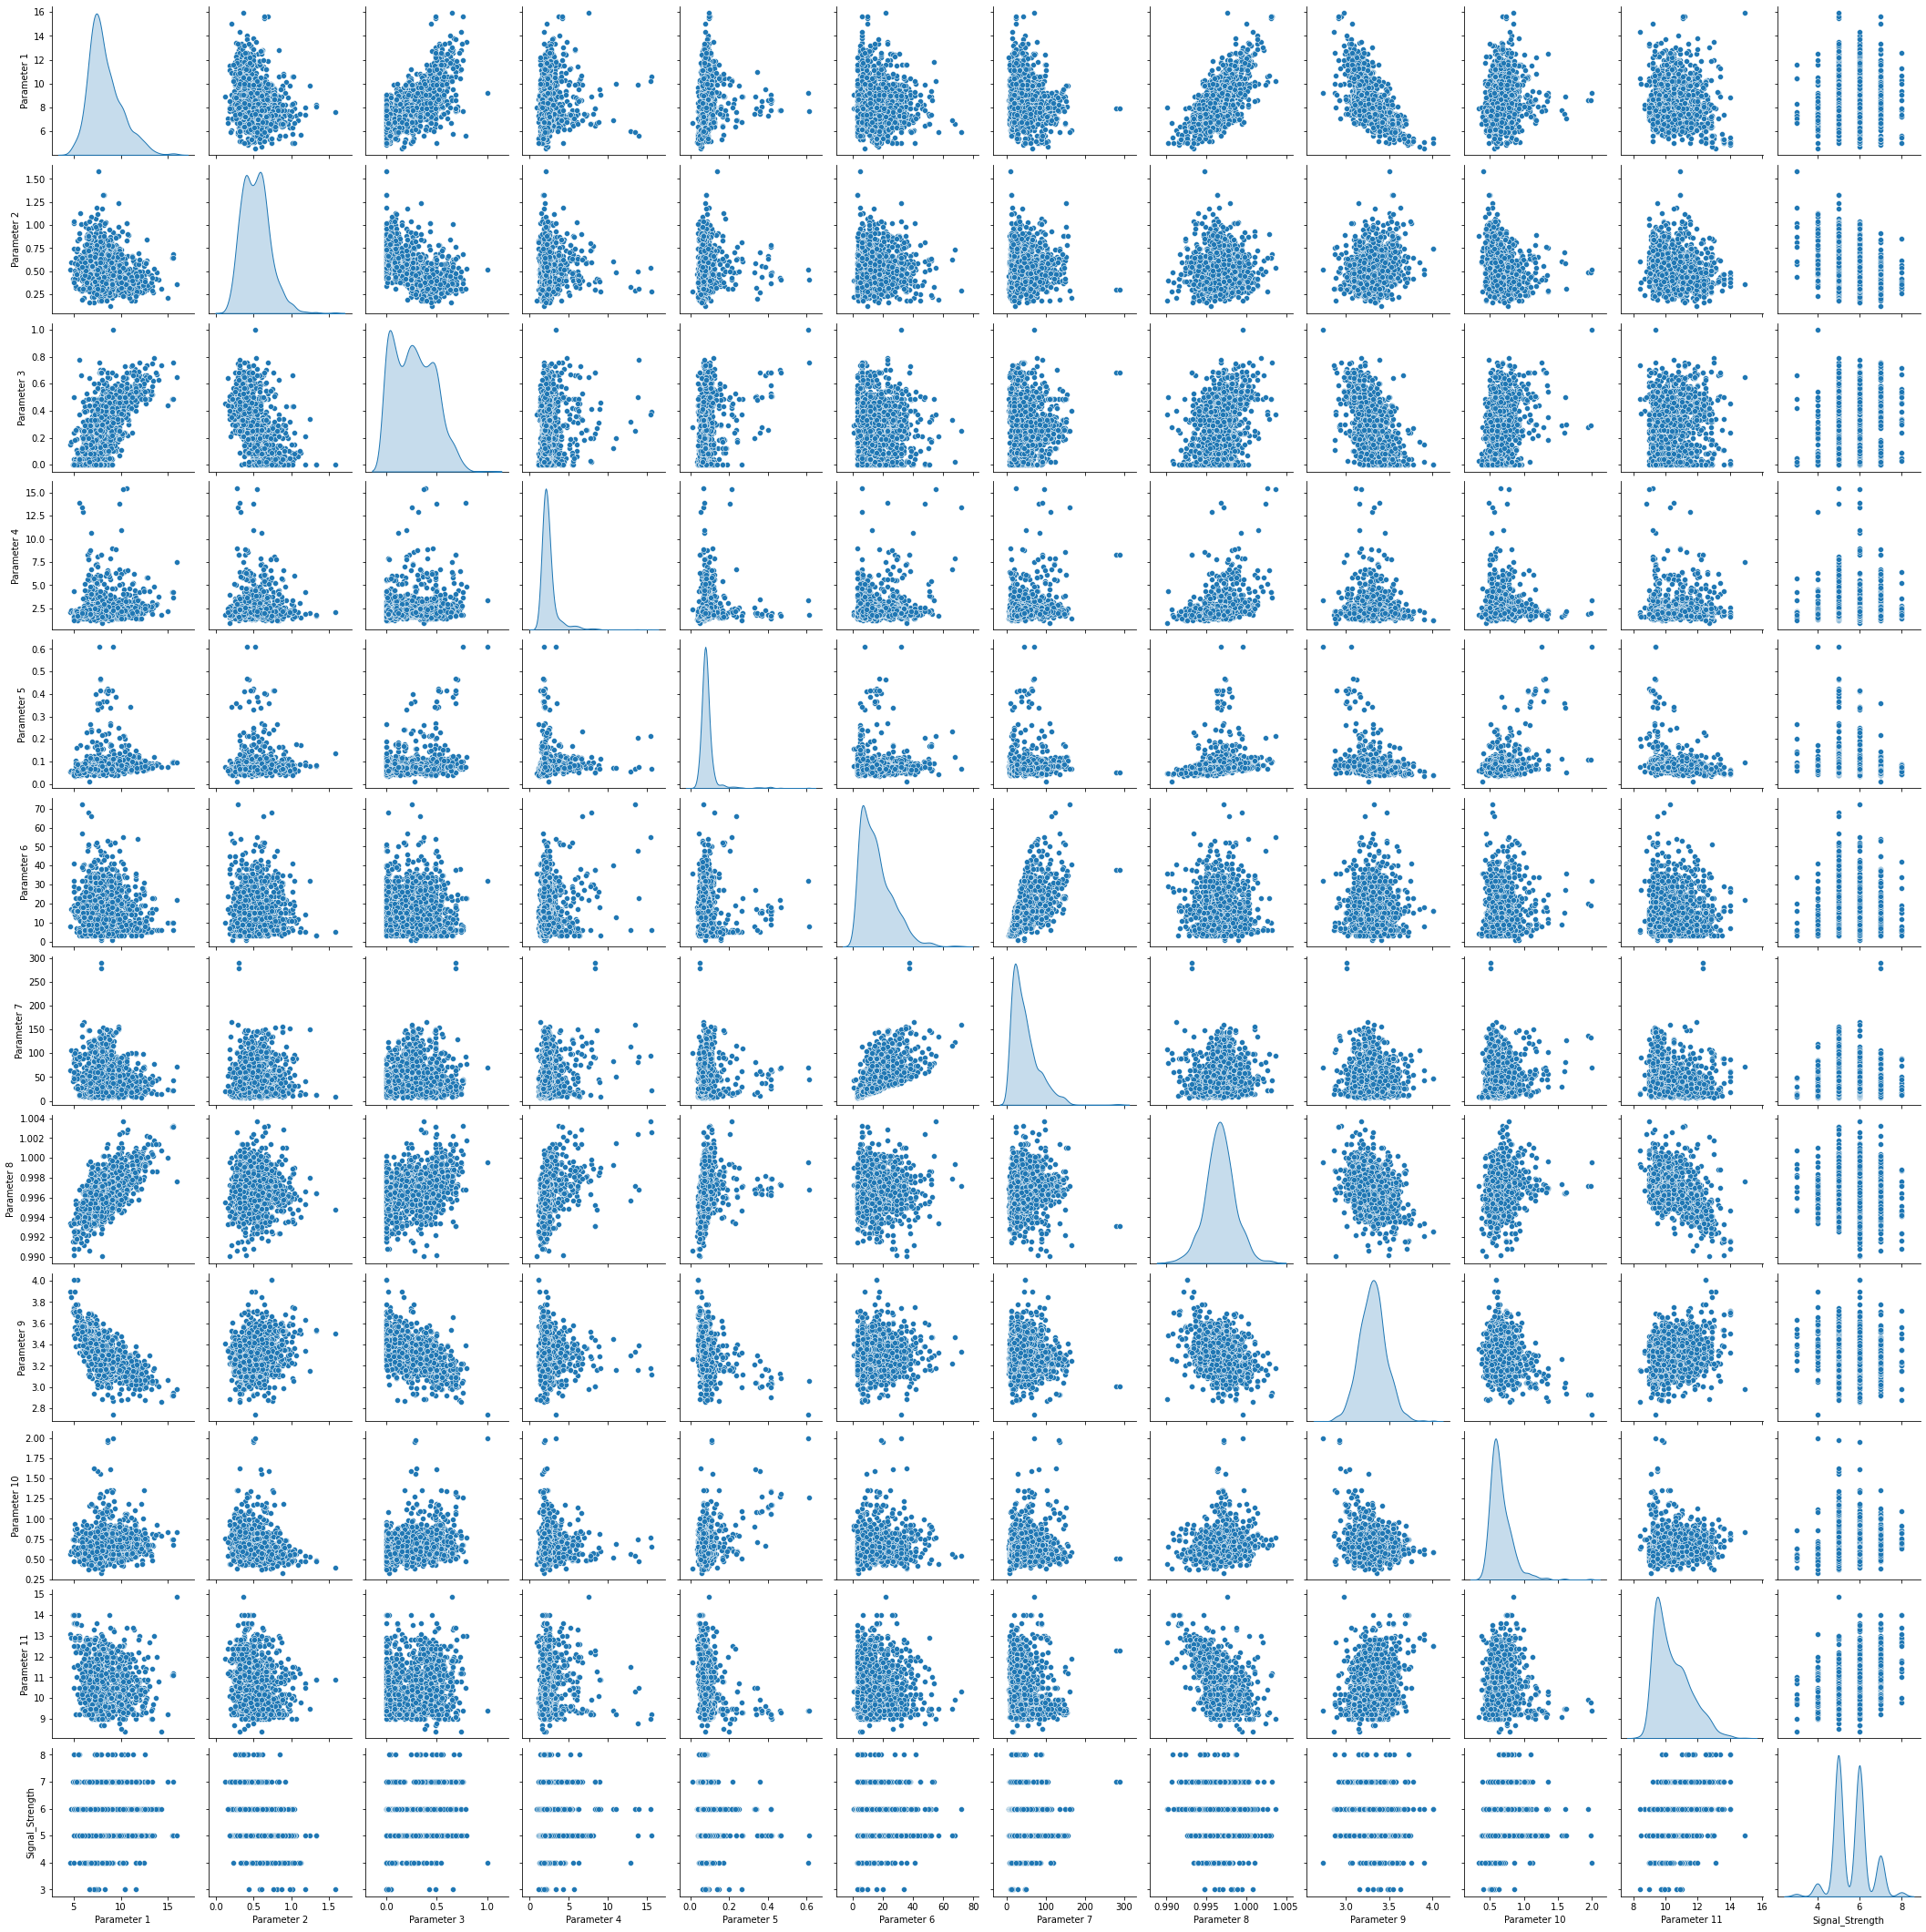

In [ ]:
sns.pairplot(data, diag_kind = "kde")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s= scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
   

In [ ]:
print(X_train_s.shape)
print(X_test_s.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


E. Transform Labels into format acceptable by Neural Network

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(951, 9)
(408, 9)


***********************

# 3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier.

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout,BatchNormalization,LeakyReLU
from keras import losses
from keras import optimizers

In [ ]:
model = Sequential()

model.add(Dense(64,input_dim = X_train_s.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(9, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 9)                 153       
                                                                 
Total params: 3,529
Trainable params: 3,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_s, y_train, batch_size = 200, epochs = 200, validation_data=(X_test_s, y_test), validation_split=0.2)

Epoch 1/200
5/5 [==============================] - 1s 45ms/step - loss: 0.7233 - accuracy: 0.0315 - val_loss: 0.7261 - val_accuracy: 0.0221
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7203 - accuracy: 0.0336 - val_loss: 0.7231 - val_accuracy: 0.0270
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7174 - accuracy: 0.0421 - val_loss: 0.7201 - val_accuracy: 0.0270
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7146 - accuracy: 0.0463 - val_loss: 0.7172 - val_accuracy: 0.0294
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7118 - accuracy: 0.0526 - val_loss: 0.7144 - val_accuracy: 0.0319
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7092 - accuracy: 0.0578 - val_loss: 0.7116 - val_accuracy: 0.0368
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 0.7066 - accuracy: 0.0641 - val_loss: 0.7090 - val_accuracy: 0.0392
Epoch 8/200
5/5 [========

C. Plot 2 separate visuals.

i. Training Loss and Validation Loss

13/13 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.4338


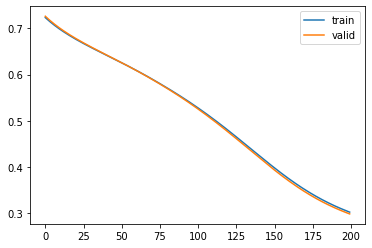

In [ ]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results = model.evaluate(X_test_s, y_test)

ii. Training Accuracy and Validation Accuracy

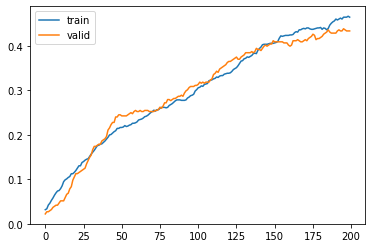

In [ ]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [ ]:
model2 = Sequential()

model2.add(Dense(256, kernel_initializer='he_uniform',input_dim = X_train_s.shape[1]))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(128, kernel_initializer='he_uniform',activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(64, kernel_initializer='he_uniform', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(32, kernel_initializer='he_uniform', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(9,activation='softmax', kernel_initializer='he_uniform'))

opt = keras.optimizers.SGD(learning_rate = 0.01, momentum=0.5)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [ ]:
history2 = model2.fit(X_train_s, y_train, batch_size = 200,  epochs = 200, validation_data=(X_test_s, y_test), validation_split=0.2,verbose=1)

Epoch 1/200
5/5 [==============================] - 1s 55ms/step - loss: 3.1443 - accuracy: 0.1157 - val_loss: 3.3144 - val_accuracy: 0.0196
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 2.8473 - accuracy: 0.1535 - val_loss: 3.0274 - val_accuracy: 0.0294
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 2.6442 - accuracy: 0.2029 - val_loss: 2.7723 - val_accuracy: 0.0588
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 2.5211 - accuracy: 0.2250 - val_loss: 2.5600 - val_accuracy: 0.1446
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 2.2592 - accuracy: 0.3060 - val_loss: 2.3939 - val_accuracy: 0.2279
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 2.1875 - accuracy: 0.3260 - val_loss: 2.2631 - val_accuracy: 0.2966
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 2.1318 - accuracy: 0.3407 - val_loss: 2.1470 - val_accuracy: 0.3676
Epoch 8/200
5/5 [===

E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

13/13 [==============================] - 0s 3ms/step - loss: 0.9818 - accuracy: 0.6176


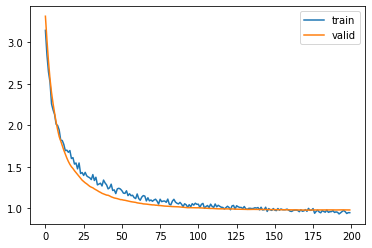

In [ ]:
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results1 = model2.evaluate(X_test_s, y_test)

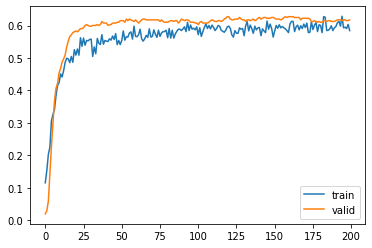

In [ ]:
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

-The error is reduced and the accuracy has increased to 61% from initial 47% when we made it a deep neural network with more hidden layers and using Regularization/Normalization techniques.

-To et more accuracy we can balance the target class since its imbalaced as observed earlier. We can build further models after using over/under sampling techniques or use ROC-AUC to find the optimal threshold and use the same for prediction.

****************************


## Model Creation after Resampling - Optional for testing the accuracy

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({5: 577, 6: 577, 7: 577, 4: 577, 8: 577, 3: 577})


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_res,y_res, test_size=0.30, random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_s= scaler.fit_transform(Xtrain)
Xtest_s = scaler.transform(Xtest)

In [ ]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [ ]:
model3 = Sequential()

model3.add(Dense(256, kernel_initializer='he_uniform',input_dim = Xtrain_s.shape[1], activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(128, kernel_initializer='he_uniform',activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(64, kernel_initializer='he_uniform', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(32, kernel_initializer='he_uniform', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(9,activation='softmax'))

opt1 = keras.optimizers.SGD(learning_rate = 0.01, momentum=0.7)
model3.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               3072      
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_17 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 128)              

In [ ]:
history3 = model3.fit(Xtrain_s, ytrain, batch_size = 200, epochs = 300, validation_data=(Xtest_s, ytest), validation_split=0.2,verbose=1)

Epoch 1/300
13/13 [==============================] - 1s 24ms/step - loss: 2.6792 - accuracy: 0.1696 - val_loss: 2.1002 - val_accuracy: 0.2570
Epoch 2/300
13/13 [==============================] - 0s 8ms/step - loss: 2.0594 - accuracy: 0.3005 - val_loss: 1.7940 - val_accuracy: 0.4110
Epoch 3/300
13/13 [==============================] - 0s 8ms/step - loss: 1.7880 - accuracy: 0.3855 - val_loss: 1.6302 - val_accuracy: 0.4321
Epoch 4/300
13/13 [==============================] - 0s 9ms/step - loss: 1.6340 - accuracy: 0.4309 - val_loss: 1.5119 - val_accuracy: 0.4832
Epoch 5/300
13/13 [==============================] - 0s 9ms/step - loss: 1.5451 - accuracy: 0.4532 - val_loss: 1.4383 - val_accuracy: 0.4947
Epoch 6/300
13/13 [==============================] - 0s 8ms/step - loss: 1.4314 - accuracy: 0.4858 - val_loss: 1.3706 - val_accuracy: 0.5207
Epoch 7/300
13/13 [==============================] - 0s 8ms/step - loss: 1.4023 - accuracy: 0.4957 - val_loss: 1.3078 - val_accuracy: 0.5178
Epoch 8/300


33/33 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.8046


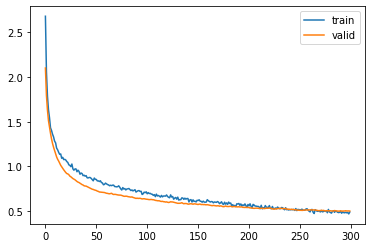

In [ ]:
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results2 = model3.evaluate(Xtest_s, ytest)

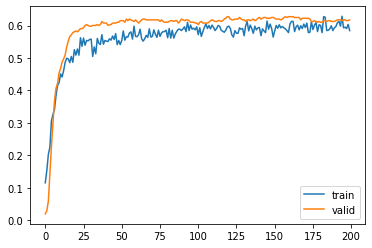

In [ ]:
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

The model performance has improved significantly after reasampling. We can still try hyperparameter tuning for further improvement of model performance

****************************

# Part B

**• DOMAIN:** Autonomous Vehicles

**• CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

**• DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images


**• PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.




**Steps and tasks:**

## Data Import and Exploration

  A. Read the .h5 file and assign to a variable

In [ ]:
import h5py
import numpy as np

f = h5py.File('/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1 (3).h5','r+')

B. Print all the keys from the .h5 file

In [ ]:
f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

C. Split the data into X_train, X_test, Y_train, Y_test

In [ ]:
X_train = f['X_train'][:]
y_train = f['y_train'][:]

X_test = f['X_test'][:]
y_test = f['y_test'][:]

## **Data Visualisation and preprocessing**

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [ ]:
print('X_train.shape:', X_train.shape, 'X_test.shape:', X_test.shape)
print('y_train.shape:',y_train.shape,'y_test.shape:', y_test.shape)

X_train.shape: (42000, 32, 32) X_test.shape: (18000, 32, 32)
y_train.shape: (42000,) y_test.shape: (18000,)


B. Visualise first 10 images in train data and print its corresponding labels.

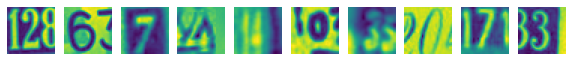

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap = 'viridis')
  plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))  


C. Reshape all the images with appropriate shape update the data in same variable. 

In [ ]:
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

print('X_train.shape:',X_train.shape,'X_train.shape:', X_test.shape)  

X_train.shape: (42000, 1024) X_train.shape: (18000, 1024)


D. Normalise the images i.e. Normalise the pixel values.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


E. Transform Labels into format acceptable by Neural Network

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [ ]:
print(y_train[:5])
print(y_test_cat[:5])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


F. Print total Number of classes in the Dataset.

In [ ]:
print('Total number of classes in the Dataset:',len(np.unique(y_train)))
print('Value after one hot encode', y_train[0])

Total number of classes in the Dataset: 2
Value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## **3. Model Training & Evaluation using Neural Network**

A. Design a Neural Network to train a classifier.

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout,BatchNormalization,Reshape
from keras import losses
from keras import optimizers
from keras import regularizers

In [ ]:
image_size = 32*32

svhn_model = Sequential()
svhn_model.add(Dense(512,activation='relu', input_dim = image_size, kernel_initializer = 'he_normal'))
svhn_model.add(BatchNormalization())
svhn_model.add(Dropout(0.2))
svhn_model.add(Dense(256,activation='relu',kernel_initializer = 'he_normal'))
svhn_model.add(BatchNormalization())
svhn_model.add(Dropout(0.2))
svhn_model.add(Dense(128,activation='relu',kernel_initializer = 'he_normal'))
svhn_model.add(BatchNormalization())
svhn_model.add(Dropout(0.2))
svhn_model.add(Dense(64,activation='relu',kernel_initializer = 'he_normal'))
svhn_model.add(BatchNormalization())
svhn_model.add(Dropout(0.2))
svhn_model.add(Dense(32,activation='relu',kernel_initializer = 'he_normal'))
svhn_model.add(BatchNormalization())
svhn_model.add(Dropout(0.2))
svhn_model.add(Dense(10, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate = 0.001)    
svhn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
svhn_history = svhn_model.fit(X_train,y_train,epochs= 200, validation_data=(X_test, y_test_cat), batch_size= 800, verbose=1)

Epoch 1/200
53/53 [==============================] - 3s 28ms/step - loss: 2.5360 - accuracy: 0.1517 - val_loss: 2.3725 - val_accuracy: 0.1204
Epoch 2/200
53/53 [==============================] - 1s 11ms/step - loss: 1.9469 - accuracy: 0.3128 - val_loss: 1.8270 - val_accuracy: 0.4194
Epoch 3/200
53/53 [==============================] - 1s 10ms/step - loss: 1.6088 - accuracy: 0.4534 - val_loss: 1.5292 - val_accuracy: 0.5176
Epoch 4/200
53/53 [==============================] - 1s 11ms/step - loss: 1.4083 - accuracy: 0.5362 - val_loss: 1.5043 - val_accuracy: 0.5011
Epoch 5/200
53/53 [==============================] - 1s 11ms/step - loss: 1.2828 - accuracy: 0.5906 - val_loss: 1.7939 - val_accuracy: 0.4039
Epoch 6/200
53/53 [==============================] - 1s 11ms/step - loss: 1.1955 - accuracy: 0.6237 - val_loss: 1.3703 - val_accuracy: 0.5342
Epoch 7/200
53/53 [==============================] - 1s 11ms/step - loss: 1.1330 - accuracy: 0.6465 - val_loss: 1.4866 - val_accuracy: 0.5076
Epoch 

Training loss, validation loss vs number of epochs

563/563 [==============================] - 2s 3ms/step - loss: 0.4675 - accuracy: 0.8597


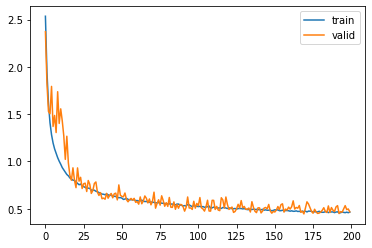

In [ ]:
import pandas as pd
svhn_hist  = pd.DataFrame(svhn_history.history)
svhn_hist['epoch'] = svhn_history.epoch

plt.plot(svhn_hist['loss'])
plt.plot(svhn_hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

svhn_results = svhn_model.evaluate(X_test, y_test_cat)

Training accuracy, validation accuracy vs number of epochs plot

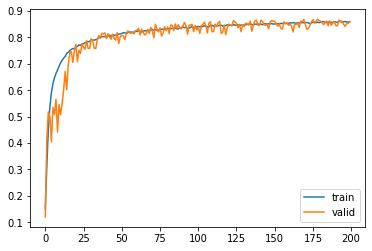

In [ ]:
plt.plot(svhn_hist['accuracy'])
plt.plot(svhn_hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


## Evaluate performance of the model with appropriate metrics.

In [ ]:
predictions = svhn_model.predict(X_test)

predictions = np.argmax(predictions, axis=-1)

563/563 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1814
           1       0.84      0.87      0.85      1828
           2       0.92      0.85      0.88      1803
           3       0.81      0.82      0.82      1719
           4       0.86      0.91      0.88      1812
           5       0.84      0.86      0.85      1768
           6       0.85      0.84      0.84      1832
           7       0.87      0.90      0.89      1808
           8       0.87      0.80      0.84      1812
           9       0.85      0.86      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



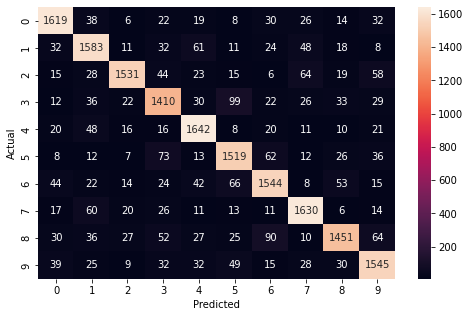

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(y_test, predictions))


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Misclassified images

In [ ]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[1, 8, 11, 12, 26, 27, 37, 40, 46, 58, 62, 68, 85, 92, 100, 108, 125, 130, 132, 136, 137, 138, 150, 151, 155, 182, 183, 184, 188, 194, 200, 203, 222, 223, 228, 230, 252, 253, 256, 267, 303, 304, 307, 323, 337, 347, 351, 363, 372, 375, 380, 395, 398, 404, 415, 418, 437, 448, 451, 456, 457, 480, 484, 498, 503, 504, 507, 514, 520, 523, 524, 527, 528, 530, 532, 535, 537, 543, 547, 551, 553, 556, 560, 563, 592, 600, 607, 612, 619, 640, 643, 663, 664, 665, 671, 690, 691, 699, 701, 706, 712, 720, 753, 768, 771, 780, 784, 795, 813, 815, 835, 838, 856, 860, 862, 865, 871, 873, 882, 887, 891, 895, 896, 908, 926, 930, 936, 937, 942, 946, 948, 951, 953, 954, 956, 965, 972, 983, 985, 988, 991, 993, 995, 997, 1001, 1006, 1013, 1026, 1029, 1041, 1045, 1046, 1050, 1051, 1057, 1060, 1068, 1086, 1089, 1091, 1106, 1109, 1115, 1126, 1132, 1133, 1137, 1139, 1142, 1147, 1148, 1150, 1155, 1156, 1159, 1175, 1186, 1189, 1204, 1205, 1207, 1208, 1220, 1222, 1227, 1229, 1232, 1242, 1244, 1252, 1255, 1260, 1272, 1

## Observation:

-The model accuracy is almost 86%
-Based on the classficiation report and the confusion matrix class 3 seems to be misclassified most as class 5 i.e almost 99 times
- Class 8 is also predicted/misclassified as class 6 almost 90 times
-The third highest as 5 misclassified/predicted as 3 by the model
- 1 as 4, 2 as 7.
- Highest error is for numbers with similar design
- We can still try and reduce the error rate using hyperparameter tuning since there are so many hyperparamters to play with however as of this stage the model looks descent.
-The training time is higher for each run on Deep neural networks